In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from torchvision import models

In [4]:
segmentation_models = models.segmentation

In [7]:
pretrained_segmentation_models = [attr for attr in dir(segmentation_models) if not attr.startswith('-')]

In [9]:
print("pre-trained segmentation models available in torchvision")
for model in pretrained_segmentation_models : print(model)

pre-trained segmentation models available in torchvision
DeepLabV3
DeepLabV3_MobileNet_V3_Large_Weights
DeepLabV3_ResNet101_Weights
DeepLabV3_ResNet50_Weights
FCN
FCN_ResNet101_Weights
FCN_ResNet50_Weights
LRASPP
LRASPP_MobileNet_V3_Large_Weights
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_utils
deeplabv3
deeplabv3_mobilenet_v3_large
deeplabv3_resnet101
deeplabv3_resnet50
fcn
fcn_resnet101
fcn_resnet50
lraspp
lraspp_mobilenet_v3_large


In [10]:
SegModel = models.segmentation.fcn_resnet101(pretrained=True).eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:04<00:00, 46.7MB/s]


In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np

In [35]:
img1 = Image.open('/content/drive/My Drive/Colab Notebooks/Segmentation/car.jpg')
img2 = Image.open('/content/drive/My Drive/Colab Notebooks/Segmentation/person.jpeg')


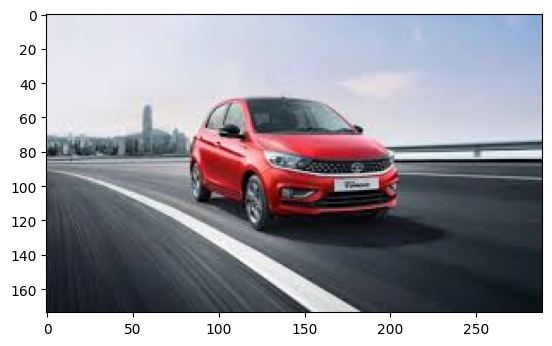

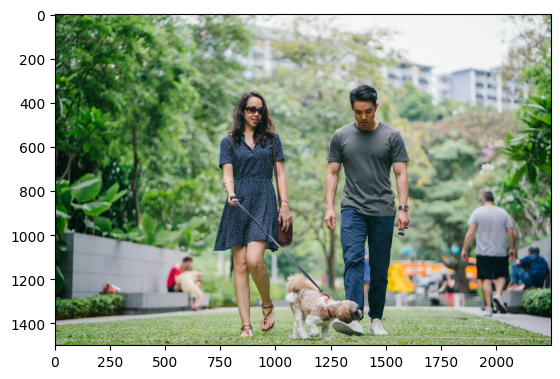

In [49]:
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [34]:
#pre-proc normalize
import torchvision.transforms as T
trf = T.Compose([T.Resize(512),
                T.CenterCrop(512),
                T.ToTensor(),
                T.Normalize(mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225])])

In [53]:
inp1 = trf(img1).unsqueeze(0)
inp2 = trf(img2).unsqueeze(0)

In [54]:
out1 = SegModel(inp1)['out']
out2 = SegModel(inp2)['out']

In [55]:
predicted1 = torch.argmax(out1.squeeze(),dim=0).detach().cpu().numpy()
print(np.unique(predicted1))
predicted2 = torch.argmax(out2.squeeze(),dim=0).detach().cpu().numpy()
print(np.unique(predicted2))

[0 7]
[ 0 12 15]


In [22]:
class_labels = [
    "background", "aeroplane", "bicycle", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow", "dining table", "dog", "horse",
    "motorbike", "person", "potted plant", "sheep", "sofa", "train", "tv/monitor"]

In [43]:
predicted_classes1 = [class_labels[idx] for idx in np.unique(predicted1)]
predicted_classes2 = [class_labels[idx] for idx in np.unique(predicted2)]



> Decode Output



In [30]:
def decode_segmap(image,nc=21) :
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)

  for l in range(0,nc) :
    idx = image == l
    r[idx] = label_colors[l,0]
    g[idx] = label_colors[l,1]
    b[idx] = label_colors[l,2]

  rgb = np.stack([r,g,b],axis=2)

  return rgb

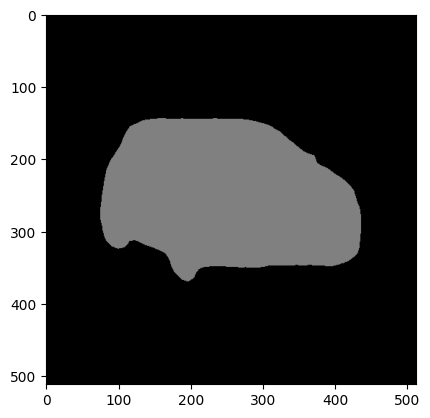

In [45]:
rgb1 = decode_segmap(predicted1)
plt.imshow(rgb1)

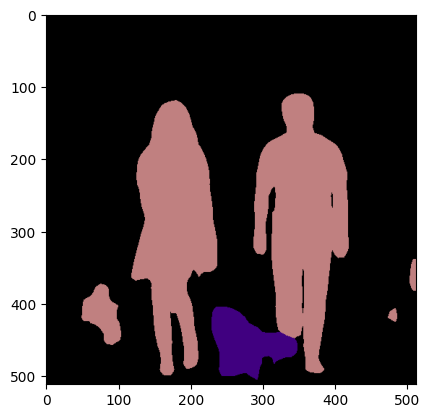

In [46]:
rgb2 = decode_segmap(predicted2)
plt.imshow(rgb2)